In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# make an API call 
#import the requests library 
import requests 

#import the API key 
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# 6.1.4 Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
#6.2.3 starting URL for Weather Map API Call 
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cfe3856151850da13b3a9c6ee190d3ac


In [6]:
#6.2.6 1- create an empty list to hold the weather data 
city_data=[]
#print the beginning of the loggins 
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters 
record_count=1
set_count=1

#6.2.6 2-loop through all the cities inout list 
for i, city in enumerate(cities):
    
    #goup cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count = 1
        time.sleep(60)
    
    #create an endpoint URL with each city 
    city_url=url+"&q="+ city.replace(" ", "+")
    
    #log the URL, record, and set numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count}| {city}")
    #add 1 to the record count 
    record_count+=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| punta arenas
Processing Record 2 of Set 1| mount gambier
Processing Record 3 of Set 1| dongsheng
Processing Record 4 of Set 1| piacabucu
Processing Record 5 of Set 1| bluff
Processing Record 6 of Set 1| butaritari
Processing Record 7 of Set 1| qaanaaq
Processing Record 8 of Set 1| vaitupu
City not found. Skipping...
Processing Record 9 of Set 1| jamestown
Processing Record 10 of Set 1| alice springs
Processing Record 11 of Set 1| lufkin
Processing Record 12 of Set 1| bethel
Processing Record 13 of Set 1| illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1| vaini
Processing Record 15 of Set 1| cidreira
Processing Record 16 of Set 1| cape town
Processing Record 17 of Set 1| millerovo
Processing Record 18 of Set 1| bonthe
Processing Record 19 of Set 1| khatanga
Processing Record 20 of Set 1| mayumba
Processing Record 21 of Set 1| georgetown
Processing Record 22 of Set 1| barrow

Processing Record 45 of Set 4| novomalorossiyskaya
Processing Record 46 of Set 4| ketchikan
Processing Record 47 of Set 4| namatanai
Processing Record 48 of Set 4| ipoti
Processing Record 49 of Set 4| gat
Processing Record 50 of Set 4| troitskoye
Processing Record 1 of Set 5| le port
Processing Record 2 of Set 5| shasta lake
Processing Record 3 of Set 5| chuy
Processing Record 4 of Set 5| mehran
Processing Record 5 of Set 5| kodiak
Processing Record 6 of Set 5| killybegs
Processing Record 7 of Set 5| vestmannaeyjar
Processing Record 8 of Set 5| henties bay
Processing Record 9 of Set 5| zambezi
Processing Record 10 of Set 5| saskylakh
Processing Record 11 of Set 5| coihueco
Processing Record 12 of Set 5| kulhudhuffushi
Processing Record 13 of Set 5| praia da vitoria
Processing Record 14 of Set 5| uk
City not found. Skipping...
Processing Record 15 of Set 5| tumannyy
City not found. Skipping...
Processing Record 16 of Set 5| lakes entrance
Processing Record 17 of Set 5| kuusamo
Processin

City not found. Skipping...
Processing Record 37 of Set 8| hailar
Processing Record 38 of Set 8| santa rosa
Processing Record 39 of Set 8| nizhniy tsasuchey
Processing Record 40 of Set 8| makakilo city
Processing Record 41 of Set 8| luderitz
Processing Record 42 of Set 8| chernyshevskiy
Processing Record 43 of Set 8| wasilla
Processing Record 44 of Set 8| murwillumbah
Processing Record 45 of Set 8| dali
Processing Record 46 of Set 8| wanning
Processing Record 47 of Set 8| kaitangata
Processing Record 48 of Set 8| severnoye
Processing Record 49 of Set 8| san andres
Processing Record 50 of Set 8| alekseyevsk
Processing Record 1 of Set 9| sayyan
Processing Record 2 of Set 9| vostok
Processing Record 3 of Set 9| atbasar
Processing Record 4 of Set 9| tautira
Processing Record 5 of Set 9| emba
Processing Record 6 of Set 9| belaya gora
Processing Record 7 of Set 9| port augusta
Processing Record 8 of Set 9| takoradi
Processing Record 9 of Set 9| longyearbyen
Processing Record 10 of Set 9| kom

Processing Record 31 of Set 12| afanasyevo
City not found. Skipping...
Processing Record 32 of Set 12| barstow
Processing Record 33 of Set 12| kamaishi
Processing Record 34 of Set 12| uruzgan
Processing Record 35 of Set 12| madimba
Processing Record 36 of Set 12| iquique
Processing Record 37 of Set 12| gizo
Processing Record 38 of Set 12| mehamn
Processing Record 39 of Set 12| palmas
Processing Record 40 of Set 12| santa cruz
Processing Record 41 of Set 12| hovd
Processing Record 42 of Set 12| ginda
Processing Record 43 of Set 12| katha
City not found. Skipping...
Processing Record 44 of Set 12| eyl
Processing Record 45 of Set 12| kelso
Processing Record 46 of Set 12| knyaginino
Processing Record 47 of Set 12| nioro
Processing Record 48 of Set 12| cape coast
Processing Record 49 of Set 12| flinders
Processing Record 50 of Set 12| dwarka
Processing Record 1 of Set 13| port hardy
Processing Record 2 of Set 13| gamba
Processing Record 3 of Set 13| zhaoyuan
-----------------------------
Da

In [7]:
#6.2.7 convert the array of dictionaries to a pandas dataframe 
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,55.42,76,75,9.22,CL,2021-12-11 13:54:55
1,Mount Gambier,-37.8333,140.7667,55.31,82,96,6.91,AU,2021-12-11 13:57:31
2,Dongsheng,39.8161,109.9776,19.06,60,5,14.43,CN,2021-12-11 13:58:56
3,Piacabucu,-10.4056,-36.4344,86.83,55,19,14.97,BR,2021-12-11 14:00:03
4,Bluff,-46.6000,168.3333,46.80,62,5,8.95,NZ,2021-12-11 13:57:27
5,Butaritari,3.0707,172.7902,82.72,77,34,15.90,KI,2021-12-11 13:57:32
6,Qaanaaq,77.4840,-69.3632,-2.90,64,34,7.23,GL,2021-12-11 13:54:55
7,Jamestown,42.0970,-79.2353,60.30,96,90,4.00,US,2021-12-11 13:56:07
8,Alice Springs,-23.7000,133.8833,71.15,30,0,5.75,AU,2021-12-11 13:58:08
9,Lufkin,31.3382,-94.7291,53.60,55,100,12.37,US,2021-12-11 13:57:18


In [9]:
#rearange column order 
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-12-11 13:54:55,-53.1500,-70.9167,55.42,76,75,9.22
1,Mount Gambier,AU,2021-12-11 13:57:31,-37.8333,140.7667,55.31,82,96,6.91
2,Dongsheng,CN,2021-12-11 13:58:56,39.8161,109.9776,19.06,60,5,14.43
3,Piacabucu,BR,2021-12-11 14:00:03,-10.4056,-36.4344,86.83,55,19,14.97
4,Bluff,NZ,2021-12-11 13:57:27,-46.6000,168.3333,46.80,62,5,8.95
5,Butaritari,KI,2021-12-11 13:57:32,3.0707,172.7902,82.72,77,34,15.90
6,Qaanaaq,GL,2021-12-11 13:54:55,77.4840,-69.3632,-2.90,64,34,7.23
7,Jamestown,US,2021-12-11 13:56:07,42.0970,-79.2353,60.30,96,90,4.00
8,Alice Springs,AU,2021-12-11 13:58:08,-23.7000,133.8833,71.15,30,0,5.75
9,Lufkin,US,2021-12-11 13:57:18,31.3382,-94.7291,53.60,55,100,12.37


In [10]:
#create the output file (CSV)
output_data_file="weather_data/cities.csv"
#export the city_data into a CSV
city_data_df.to_csv(output_data_file,index_label="City_ID")
#the index label part will add a header in the CSV file to column A or the index 

In [11]:
#extract the relevent feilds from the dataframe for plotting 
lats=city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

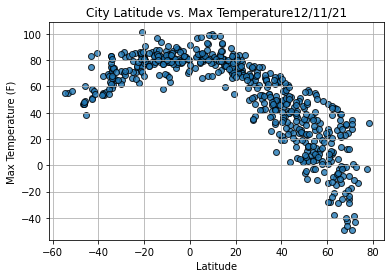

In [14]:
#6.3.1 create a scannter plot for latitude vs. max tempterature 
#import time module 
import time 

#build the scatter plot for lat vs. max temp
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", 
           linewidths=1, 
           marker="o", 
           alpha=0.8,
           label="Cities")

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure 
plt.savefig("weather_data/Fig1.png")

#Show Plot 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

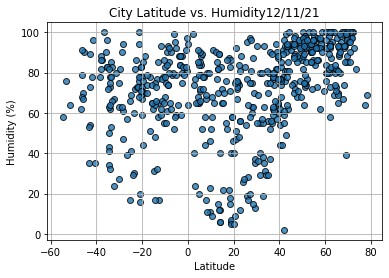

In [15]:
#6.3.2 build the scatter plot for lat vs. humidity
plt.scatter(lats, 
           humidity, 
           edgecolor="black", 
           linewidths=1, 
           marker="o", 
           alpha=0.8,
           label="Cities")

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure 
plt.savefig("weather_data/Fig2.png")

#Show Plot 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

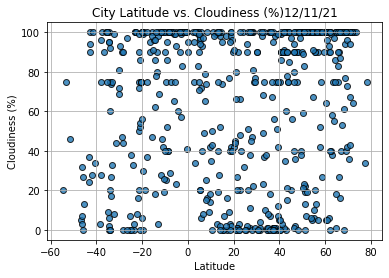

In [16]:
#6.3.3 build the scatter plot for lat vs. cloudiness
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", 
           linewidths=1, 
           marker="o", 
           alpha=0.8,
           label="Cities")

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure 
plt.savefig("weather_data/Fig3.png")

#Show Plot 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

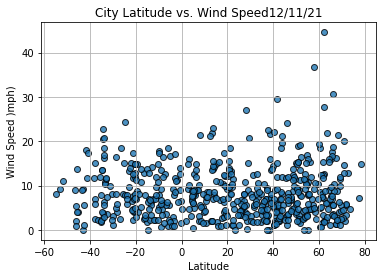

In [17]:
#6.3.4 build the scatter plot for lat vs. wind speed
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", 
           linewidths=1, 
           marker="o", 
           alpha=0.8,
           label="Cities")

#incorporate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed )mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure 
plt.savefig("weather_data/Fig4png")

#Show Plot 
plt.show